# Introduction

This project involves analyzing a provided dataset that contains information about the voting behavior of various counties in the United States. The goal is to use classification methods to predict whether a county will vote "yes" or "no" to legalizing gaming through a ballot.

0 = NO
1 = Yes

# Data Preprocessing

In this data preprocessing I took time just getting a feel for the data given and seeing what I wanted and didnt want in my dataframe.

In [2]:
# Mounting Google Drive add some .shapes mf for the screenshot
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [4]:
# reading the data
df = pd.read_csv("/content/drive/MyDrive/IS470_Data/Gaming Ballot Data Set-1.csv")
df

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,"$15,607","$34,618",...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,"$13,740","$23,114",...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,"$24,187","$44,874",...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,"$12,816","$27,359",...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,"$19,017","$23,054",...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,41,44069,27316,71385,1,1,354527,"$18,893","$27,622",...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1283,18,42,10026,9755,19781,1,1,53029,"$20,082","$33,810",...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1284,18,43,126397,76905,203302,1,1,732143,"$28,711","$49,763",...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1285,18,44,26412,23464,49876,1,1,153293,"$25,791","$38,751",...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


In [5]:
df.keys()

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'],
      dtype='object')

In [6]:
df.dtypes

State No                                  int64
County No                                 int64
FOR                                       int64
AGAINST                                   int64
TOTAL CASTE                               int64
DEPENDENT VARIABLE                        int64
BALLOT TYPE                               int64
POPULATION                                int64
PCI                                      object
MEDIUM FAMILY INCOME                     object
SIZE OF COUNTY                          float64
POPULATION DENSITY                      float64
PERCENT WHITE                           float64
PERCENT BLACK                           float64
PERCENT OTHER                           float64
PERCENT MALE                            float64
PERCENT FEMALE                          float64
NO OF CHURCHES                            int64
NO OF CHURCH MEMBERS                     object
PERCENT CHURCH MEMBERS OF POPULATION     object
POVERTY LEVEL                           

In [7]:
#Select the desired columns only
desired_columns = ['State No','DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'POPULATION DENSITY','PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE' , 'POVERTY LEVEL'
       ,'UNEMPLOYMENT RATE','AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64','AGE OLDER THAN 65', 'MSA']

gaming_desired = df[desired_columns]

In [8]:
df = gaming_desired.copy()
df.loc[:, 'DEPENDENT VARIABLE'] = df['DEPENDENT VARIABLE'].replace({0: 'No', 1: 'Yes'})

In [9]:
df.head(10)

,State No,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MALE,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
0,1,Yes,1,265038,"$15,607","$34,618",223.29,0.75,0.03,0.22,0.496,10.4,5.0,80600,22627,94724,46933,20154,1
1,1,Yes,1,13617,"$13,740","$23,114",18.81,0.59,0.00,0.40,0.491,24.8,7.0,4285,1861,4092,2114,1265,2
2,1,Yes,1,391511,"$24,187","$44,874",490.34,0.85,0.06,0.09,0.488,5.9,3.0,111243,29574,150740,70783,29171,1
3,1,Yes,1,5345,"$12,816","$27,359",3.99,0.74,0.00,0.26,0.510,16.9,5.0,1647,229,1670,1178,621,2
4,1,No,1,4556,"$19,017","$23,054",1.77,0.93,0.00,0.07,0.495,19.0,1.0,1192,220,1231,973,940,2
5,1,Yes,1,5048,"$13,742","$22,325",3.32,0.71,0.01,0.28,0.520,20.4,3.0,1401,221,1346,1127,953,2
6,1,Yes,1,225339,"$21,782","$43,782",304.50,0.90,0.01,0.10,0.501,11.0,4.0,55588,29072,86366,37104,17209,1
7,1,Yes,1,12684,"$13,116","$25,439",12.52,0.88,0.02,0.11,0.536,14.3,6.0,3032,926,3935,2703,2088,2
8,1,Yes,1,2397,"$19,356","$30,053",1.34,0.96,0.00,0.04,0.509,11.6,1.0,775,121,742,383,376,2
9,1,Yes,1,7619,"$17,826","$41,111",19.29,0.96,0.00,0.04,0.519,9.5,3.0,2058,340,3119,1558,544,2


In [10]:
# In this part I removed the $ and the , so I wont run into errors in the future.
df['MEDIUM FAMILY INCOME'] = df['MEDIUM FAMILY INCOME'].replace('\$', '', regex=True).replace(',', '', regex=True)
# Convert the column to float type
df['MEDIUM FAMILY INCOME'] = df['MEDIUM FAMILY INCOME'].astype('int64')

In [11]:
# I did the same thing here and swiched them to int64
df['PCI'] = df['PCI'].replace('\$', '', regex=True).replace(',', '', regex=True)

df['PCI'] = df['PCI'].astype('int64')

In [12]:
# Examine missing values
df.isnull().sum()

State No                0
DEPENDENT VARIABLE      0
BALLOT TYPE             0
POPULATION              0
PCI                     0
MEDIUM FAMILY INCOME    0
POPULATION DENSITY      0
PERCENT WHITE           0
PERCENT BLACK           0
PERCENT OTHER           0
PERCENT MALE            0
POVERTY LEVEL           0
UNEMPLOYMENT RATE       0
AGE LESS THAN 18        0
AGE24                   0
AGE44                   0
AGE64                   0
AGE OLDER THAN 65       0
MSA                     0
dtype: int64

In [13]:
df['DEPENDENT VARIABLE'] = df['DEPENDENT VARIABLE'].astype('category')
df['BALLOT TYPE'] = df['BALLOT TYPE'].astype('category')
df['MSA'] = df['MSA'].astype('category')

In [14]:
df.dtypes

State No                   int64
DEPENDENT VARIABLE      category
BALLOT TYPE             category
POPULATION                 int64
PCI                        int64
MEDIUM FAMILY INCOME       int64
POPULATION DENSITY       float64
PERCENT WHITE            float64
PERCENT BLACK            float64
PERCENT OTHER            float64
PERCENT MALE             float64
POVERTY LEVEL            float64
UNEMPLOYMENT RATE        float64
AGE LESS THAN 18           int64
AGE24                      int64
AGE44                      int64
AGE64                      int64
AGE OLDER THAN 65          int64
MSA                     category
dtype: object

In [15]:
# Display all numeric variables
df.select_dtypes(include=['number'])

,State No,POPULATION,PCI,MEDIUM FAMILY INCOME,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MALE,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65
0,1,265038,15607,34618,223.29,0.75,0.03,0.22,0.496,10.4,5.0,80600,22627,94724,46933,20154
1,1,13617,13740,23114,18.81,0.59,0.00,0.40,0.491,24.8,7.0,4285,1861,4092,2114,1265
2,1,391511,24187,44874,490.34,0.85,0.06,0.09,0.488,5.9,3.0,111243,29574,150740,70783,29171
3,1,5345,12816,27359,3.99,0.74,0.00,0.26,0.510,16.9,5.0,1647,229,1670,1178,621
4,1,4556,19017,23054,1.77,0.93,0.00,0.07,0.495,19.0,1.0,1192,220,1231,973,940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,354527,18893,27622,74.68,0.49,0.01,0.49,0.498,27.9,15.6,124607,30781,100927,62657,35555
1283,18,53029,20082,33810,23.17,0.87,0.03,0.10,0.526,14.8,8.0,11972,3497,16099,12015,9446
1284,18,732143,28711,49763,334.27,0.62,0.02,0.36,0.505,10.3,5.6,208062,65744,235177,146412,76748
1285,18,153293,25791,38751,152.51,0.65,0.02,0.33,0.497,15.8,5.4,39727,23948,46570,27627,15421


In [16]:
# Display all category variables
df.select_dtypes(include=['category'])

,DEPENDENT VARIABLE,BALLOT TYPE,MSA
0,Yes,1,1
1,Yes,1,2
2,Yes,1,1
3,Yes,1,2
4,No,1,2
...,...,...,...
1282,Yes,1,1
1283,Yes,1,2
1284,Yes,1,1
1285,Yes,1,1


In [17]:
# I wanted to see if ppoverty level had an impact on their decision on voting yes or no and it is sitting at 42 rows for yes.
df[(df['POVERTY LEVEL'] > 30) & (df['DEPENDENT VARIABLE']== 'Yes')]

,State No,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MALE,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
11,1,Yes,1,3190,11705,15127,2.59,0.22,0.00,0.78,0.500,34.6,10.0,945,214,827,685,519,2
54,1,Yes,1,4619,11887,23569,1.46,0.51,0.00,0.49,0.513,30.6,11.0,1524,307,1414,799,575,2
67,2,Yes,1,40512,14369,20252,48.66,0.68,0.30,0.02,0.493,30.1,9.4,11315,3802,11250,8379,5766,2
80,2,Yes,1,9103,14099,14340,21.60,0.32,0.66,0.01,0.469,48.6,17.3,3167,904,2087,1738,1207,2
83,2,Yes,1,22062,14735,19724,35.39,0.66,0.33,0.01,0.473,31.2,10.4,6590,2035,5466,4640,3331,2
95,2,Yes,1,13073,14691,18448,20.95,0.37,0.62,0.01,0.480,36.9,13.0,4341,1244,3433,2451,1604,2
98,2,Yes,1,474051,22472,22285,2624.87,0.31,0.64,0.05,0.468,33.6,7.8,127441,54326,142290,90253,59741,1
104,2,Yes,1,20829,15603,19708,37.29,0.61,0.38,0.01,0.470,30.9,10.6,6302,1864,5369,4228,3066,2
111,2,Yes,1,82804,16426,21130,89.16,0.56,0.43,0.01,0.477,30.1,8.3,25386,7713,21907,17331,10467,1
116,2,Yes,1,6829,16996,17001,11.33,0.44,0.55,0.00,0.461,39.0,9.3,2178,548,1744,1273,1086,2


In [18]:
# And we are sitting at 26 rows for no.
df[(df['POVERTY LEVEL'] > 30) & (df['DEPENDENT VARIABLE']== 'No')]

,State No,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MALE,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
10,1,No,1,7453,9534,17155,5.80,0.39,0.00,0.61,0.497,33.9,11.0,2694,434,1918,1364,1043,2
129,3,No,1,7191,12633,16917,5.20,0.62,0.00,0.38,0.504,31.7,8.0,2436,590,1764,1282,1119,2
166,3,No,1,12807,9720,15163,14.20,0.33,0.00,0.67,0.490,40.7,14.6,4753,1211,3504,2012,1327,2
169,3,No,1,3781,7198,14838,3.40,0.24,0.00,0.76,0.517,47.4,15.2,1597,365,1046,542,231,2
219,4,No,2,13943,12932,21292,15.45,0.30,0.00,0.70,0.493,30.9,12.6,5478,1186,3701,2302,1276,2
222,4,No,2,4093,9109,18677,3.74,0.21,0.00,0.79,0.513,36.7,6.6,1816,352,1095,626,204,2
704,11,No,2,3077,11976,20003,2.60,0.53,0.00,0.47,0.489,33.4,5.0,1141,236,792,529,379,2
716,11,No,2,4224,10146,18692,1.71,0.50,0.00,0.50,0.508,34.5,23.0,1614,280,976,772,582,2
721,11,No,2,5525,9887,19703,2.40,0.32,0.00,0.68,0.487,32.0,12.1,2317,451,1463,861,433,2
736,11,No,2,2835,10483,21587,1.52,0.56,0.00,0.44,0.499,31.0,4.0,1054,210,725,514,332,2


In [19]:
# Obtain the variance, standard deviation, and range of a numeric varaible: MEDIUM FAMILY INCOME
print("variance: ", df['MEDIUM FAMILY INCOME'].var(), "standard deviation: ", df['MEDIUM FAMILY INCOME'].std(), "range: ", df['MEDIUM FAMILY INCOME'].min(), df['MEDIUM FAMILY INCOME'].max())

variance:  41010771.66421362 standard deviation:  6403.965307855253 range:  12225 55643


In [20]:
df['MEDIUM FAMILY INCOME'].describe()

count     1287.000000
mean     27398.725719
std       6403.965308
min      12225.000000
25%      22907.000000
50%      26508.000000
75%      31060.500000
max      55643.000000
Name: MEDIUM FAMILY INCOME, dtype: float64

In the data preprocessing phase of my project, I focused on transforming data types and conducting analyses on poverty levels. By converting data types and exploring variations in poverty levels, I gained crucial insights that guided my approach for the remainder of the project.

# Data Visulation

This section I will be preforming visulations to gain a better understanding of the data. Finding possible trends or things that might catch my eye insulting in further examination.

Text(0.5, 1.0, 'Boxplot of MEDIUM FAMILY INCOME')

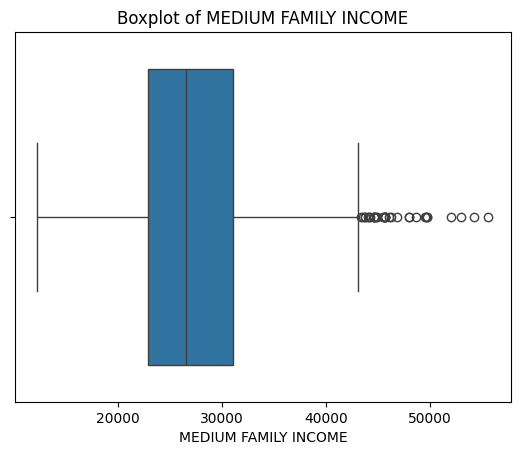

In [21]:
# Boxplot of a numeric variable: MEDIUM FAMILY INCOME
snsplot = sns.boxplot(x='MEDIUM FAMILY INCOME', data = df)
snsplot.set_title("Boxplot of MEDIUM FAMILY INCOME")

<ipython-input-22-783b95614482>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'AGE44']].corr()


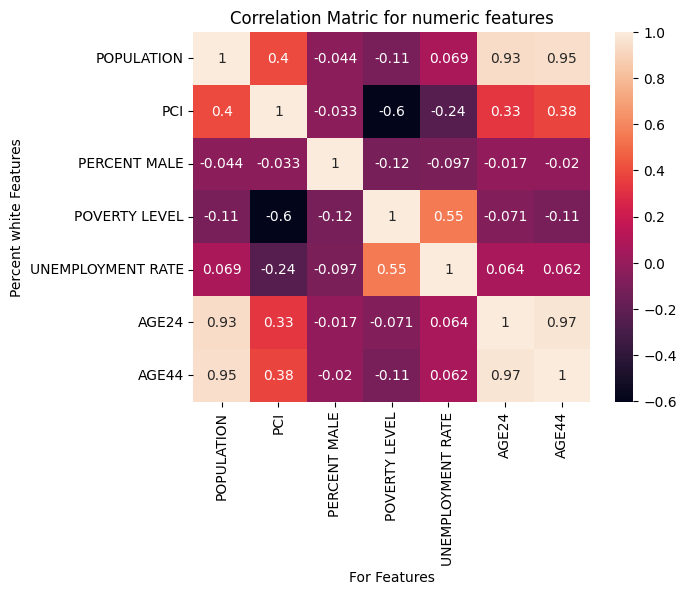

In [22]:
# In this visulation I wanted to see how a few variables were related to my target variable.
correlation_matrix = df[[ 'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
                         'PERCENT MALE','POVERTY LEVEL','UNEMPLOYMENT RATE', 'AGE24',
                          'AGE44']].corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for numeric features')

plt.xlabel('For Features')

plt.ylabel('Percent white Features')

plt.show()

Text(0.5, 1.0, 'ballot type who picked wagering or gambing')

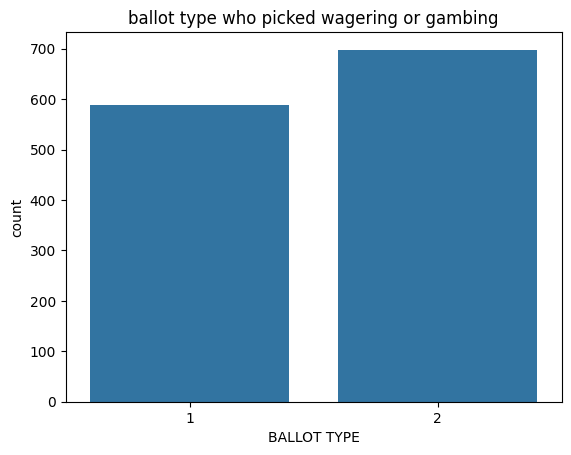

In [23]:
# this shows that wagering is more accepted compared to gambing.
snsplot = sns.countplot(x='BALLOT TYPE', data=df)
snsplot.set_title("ballot type who picked wagering or gambing")

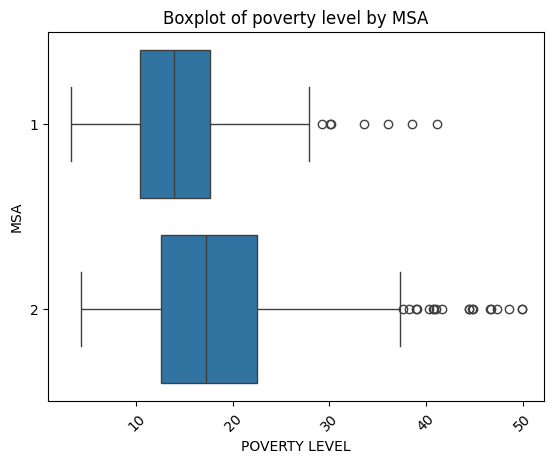

In [24]:
sns.boxplot(x='POVERTY LEVEL', y='MSA', data=df)
plt.xlabel('POVERTY LEVEL')
plt.ylabel('MSA')
plt.title('Boxplot of poverty level by MSA')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Histogram of Unemployment rate in data set')

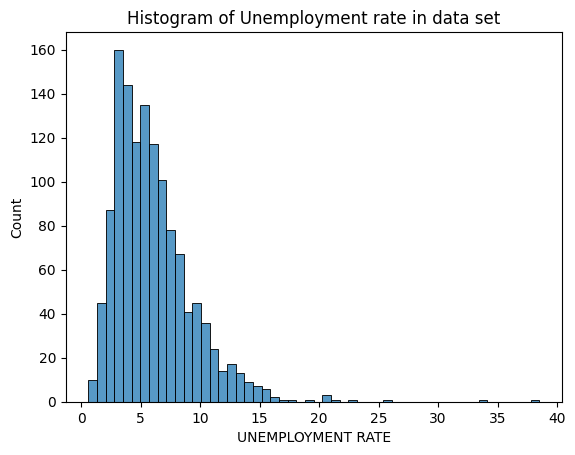

In [25]:
# Histogram of a numeric variable: Unemployment Rate
snsplot = sns.histplot(x='UNEMPLOYMENT RATE', data = df)
snsplot.set_title("Histogram of Unemployment rate in data set")

In the data visualization section of my project, I employed various techniques to gain insights into the data. This included using heat maps, histograms specifically focusing on the unemployment rate, and box plots. These visualizations helped me analyze patterns, distributions, and correlations within the data, providing valuable insights for further analysis and model development.

# Model development

In this section I will be developing the models which will be 3 modles in total. I will be analizing these models and seeing which do better or worse. I will eloborate at the end.

## Decision Tree model




In [26]:
df = pd.get_dummies(df, columns=[ 'BALLOT TYPE', 'MSA'], drop_first=True)
df

,State No,DEPENDENT VARIABLE,POPULATION,PCI,MEDIUM FAMILY INCOME,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MALE,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,BALLOT TYPE_2,MSA_2
0,1,Yes,265038,15607,34618,223.29,0.75,0.03,0.22,0.496,10.4,5.0,80600,22627,94724,46933,20154,0,0
1,1,Yes,13617,13740,23114,18.81,0.59,0.00,0.40,0.491,24.8,7.0,4285,1861,4092,2114,1265,0,1
2,1,Yes,391511,24187,44874,490.34,0.85,0.06,0.09,0.488,5.9,3.0,111243,29574,150740,70783,29171,0,0
3,1,Yes,5345,12816,27359,3.99,0.74,0.00,0.26,0.510,16.9,5.0,1647,229,1670,1178,621,0,1
4,1,No,4556,19017,23054,1.77,0.93,0.00,0.07,0.495,19.0,1.0,1192,220,1231,973,940,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,Yes,354527,18893,27622,74.68,0.49,0.01,0.49,0.498,27.9,15.6,124607,30781,100927,62657,35555,0,0
1283,18,Yes,53029,20082,33810,23.17,0.87,0.03,0.10,0.526,14.8,8.0,11972,3497,16099,12015,9446,0,1
1284,18,Yes,732143,28711,49763,334.27,0.62,0.02,0.36,0.505,10.3,5.6,208062,65744,235177,146412,76748,0,0
1285,18,Yes,153293,25791,38751,152.51,0.65,0.02,0.33,0.497,15.8,5.4,39727,23948,46570,27627,15421,0,0


In [27]:
# Examine the porportion of target variable for data set
target = df['DEPENDENT VARIABLE']
print(target.value_counts(normalize=True))

No     0.574204
Yes    0.425796
Name: DEPENDENT VARIABLE, dtype: float64


In [28]:
# Partition the data
predictors = df.drop(['DEPENDENT VARIABLE'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(900, 18) (387, 18) (900,) (387,)


In [29]:
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['DEPENDENT VARIABLE'] == 'No']
minority_df = combined_train_df[combined_train_df['DEPENDENT VARIABLE'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['DEPENDENT VARIABLE'])
target_train = balanced_data['DEPENDENT VARIABLE']\

print(target_train.value_counts(normalize=True), target_train.shape)

# Now the data is balanced!!

No     0.5
Yes    0.5
Name: DEPENDENT VARIABLE, dtype: float64 (742,)


In [30]:
print(target_test.value_counts(normalize=True))

No     0.542636
Yes    0.457364
Name: DEPENDENT VARIABLE, dtype: float64


### Decision Tree depth of 3

In [31]:
# Build a decision tree model on training data with max_depth = 3

model = DecisionTreeClassifier(criterion = "entropy", random_state=1, max_depth = 3)

model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.4230769230769231, 0.875, 'State No <= 2.5\nentropy = 1.0\nsamples = 742\nvalue = [371, 371]\nclass = No'),
 Text(0.15384615384615385, 0.625, 'PERCENT OTHER <= 0.06\nentropy = 0.213\nsamples = 89\nvalue = [3, 86]\nclass = Yes'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 61\nvalue = [0, 61]\nclass = Yes'),
 Text(0.23076923076923078, 0.375, 'PERCENT MALE <= 0.495\nentropy = 0.491\nsamples = 28\nvalue = [3, 25]\nclass = Yes'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.811\nsamples = 12\nvalue = [3, 9]\nclass = Yes'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = Yes'),
 Text(0.6923076923076923, 0.625, 'State No <= 8.5\nentropy = 0.988\nsamples = 653\nvalue = [368, 285]\nclass = No'),
 Text(0.5384615384615384, 0.375, 'PERCENT BLACK <= 0.185\nentropy = 0.07\nsamples = 120\nvalue = [119, 1]\nclass = No'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]\nclass = No'),
 Text(0.615384615384

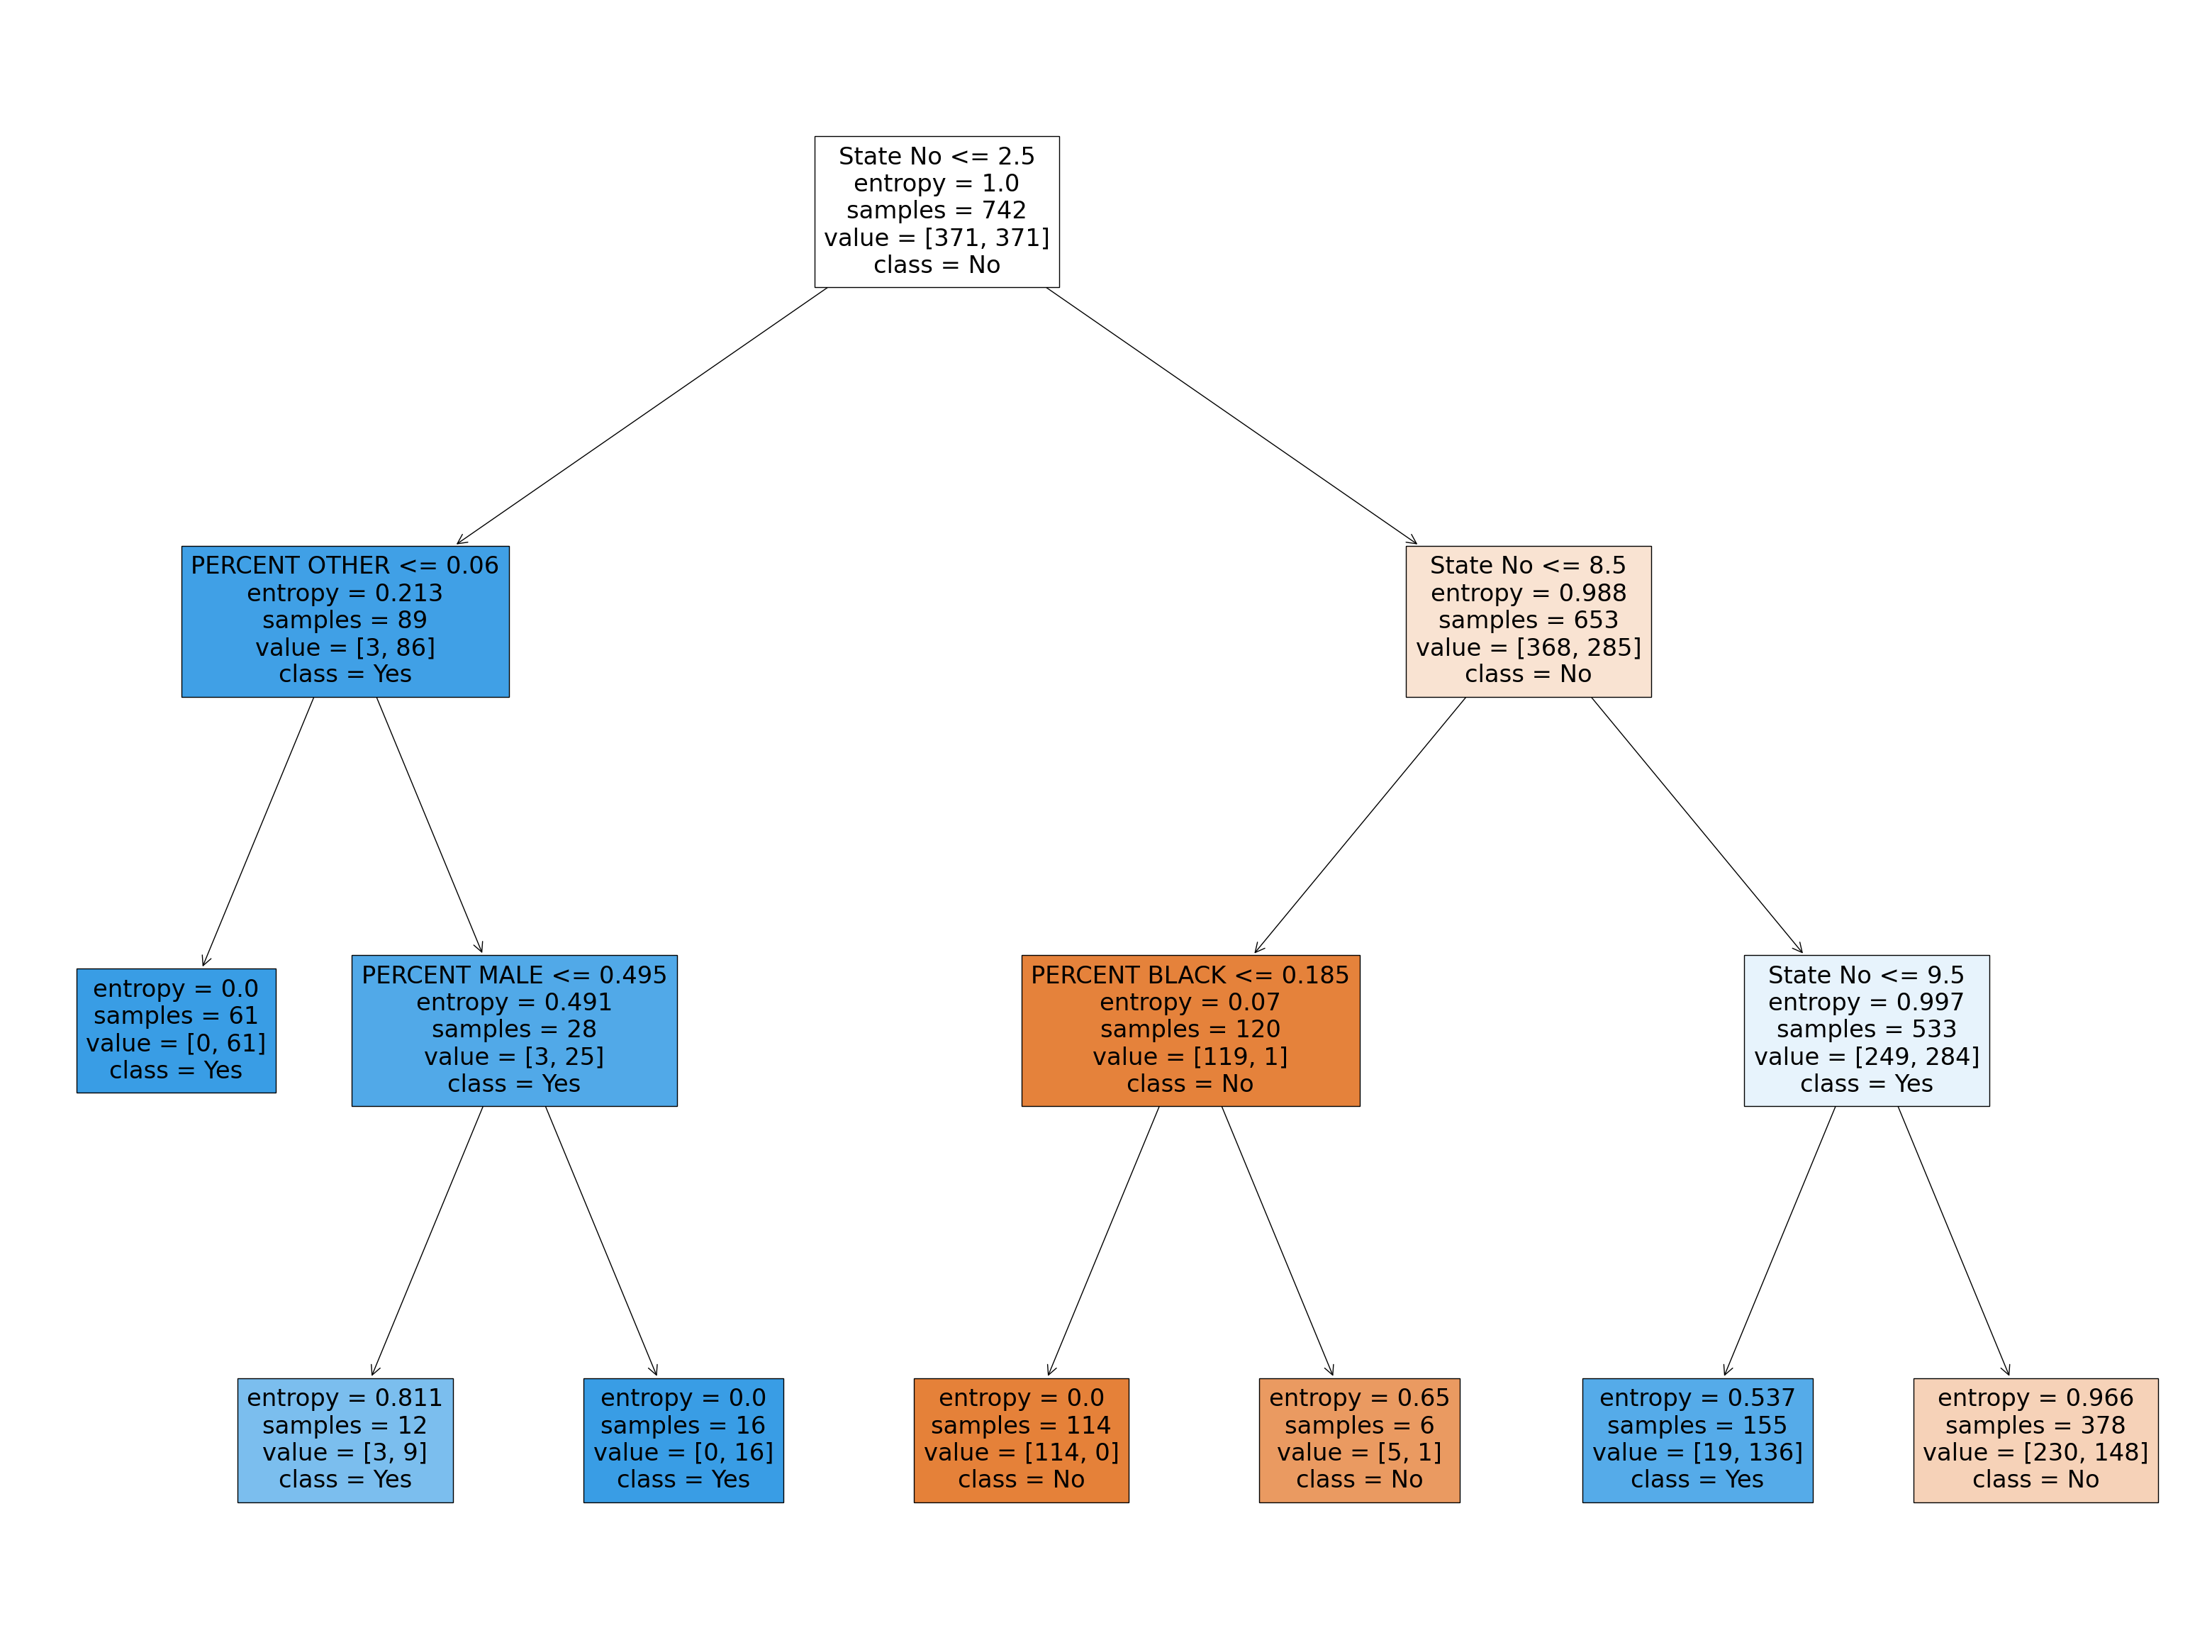

In [32]:
# plotting the tree

fig = plt.figure(figsize=(40,30))
tree.plot_tree(model,
               feature_names = list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [33]:
# Now I will have the model make a prediction on test data.

prediction_on_test = model.predict(predictors_test)

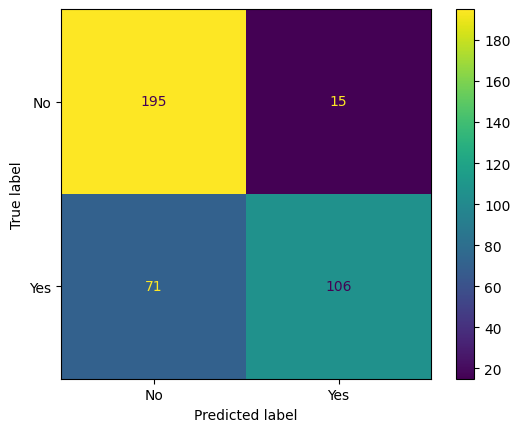

In [34]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [35]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score

print(classification_report(target_test, prediction_on_test))


              precision    recall  f1-score   support

          No       0.73      0.93      0.82       210
         Yes       0.88      0.60      0.71       177

    accuracy                           0.78       387
   macro avg       0.80      0.76      0.77       387
weighted avg       0.80      0.78      0.77       387



### Decision Tree depth of 5

In [36]:
# Build a decision tree model on training data with max_depth = 5

model2 = DecisionTreeClassifier(criterion = "entropy", random_state=1, max_depth = 5)

model2.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.28, 0.9166666666666666, 'State No <= 2.5\nentropy = 1.0\nsamples = 742\nvalue = [371, 371]\nclass = No'),
 Text(0.08, 0.75, 'PERCENT OTHER <= 0.06\nentropy = 0.213\nsamples = 89\nvalue = [3, 86]\nclass = Yes'),
 Text(0.04, 0.5833333333333334, 'entropy = 0.0\nsamples = 61\nvalue = [0, 61]\nclass = Yes'),
 Text(0.12, 0.5833333333333334, 'PERCENT MALE <= 0.495\nentropy = 0.491\nsamples = 28\nvalue = [3, 25]\nclass = Yes'),
 Text(0.08, 0.4166666666666667, 'POVERTY LEVEL <= 15.0\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]\nclass = Yes'),
 Text(0.04, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Yes'),
 Text(0.12, 0.25, 'PERCENT WHITE <= 0.77\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = Yes'),
 Text(0.08, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.16, 0.08333333333333333, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.16, 0.4166666666666667, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]\ncla

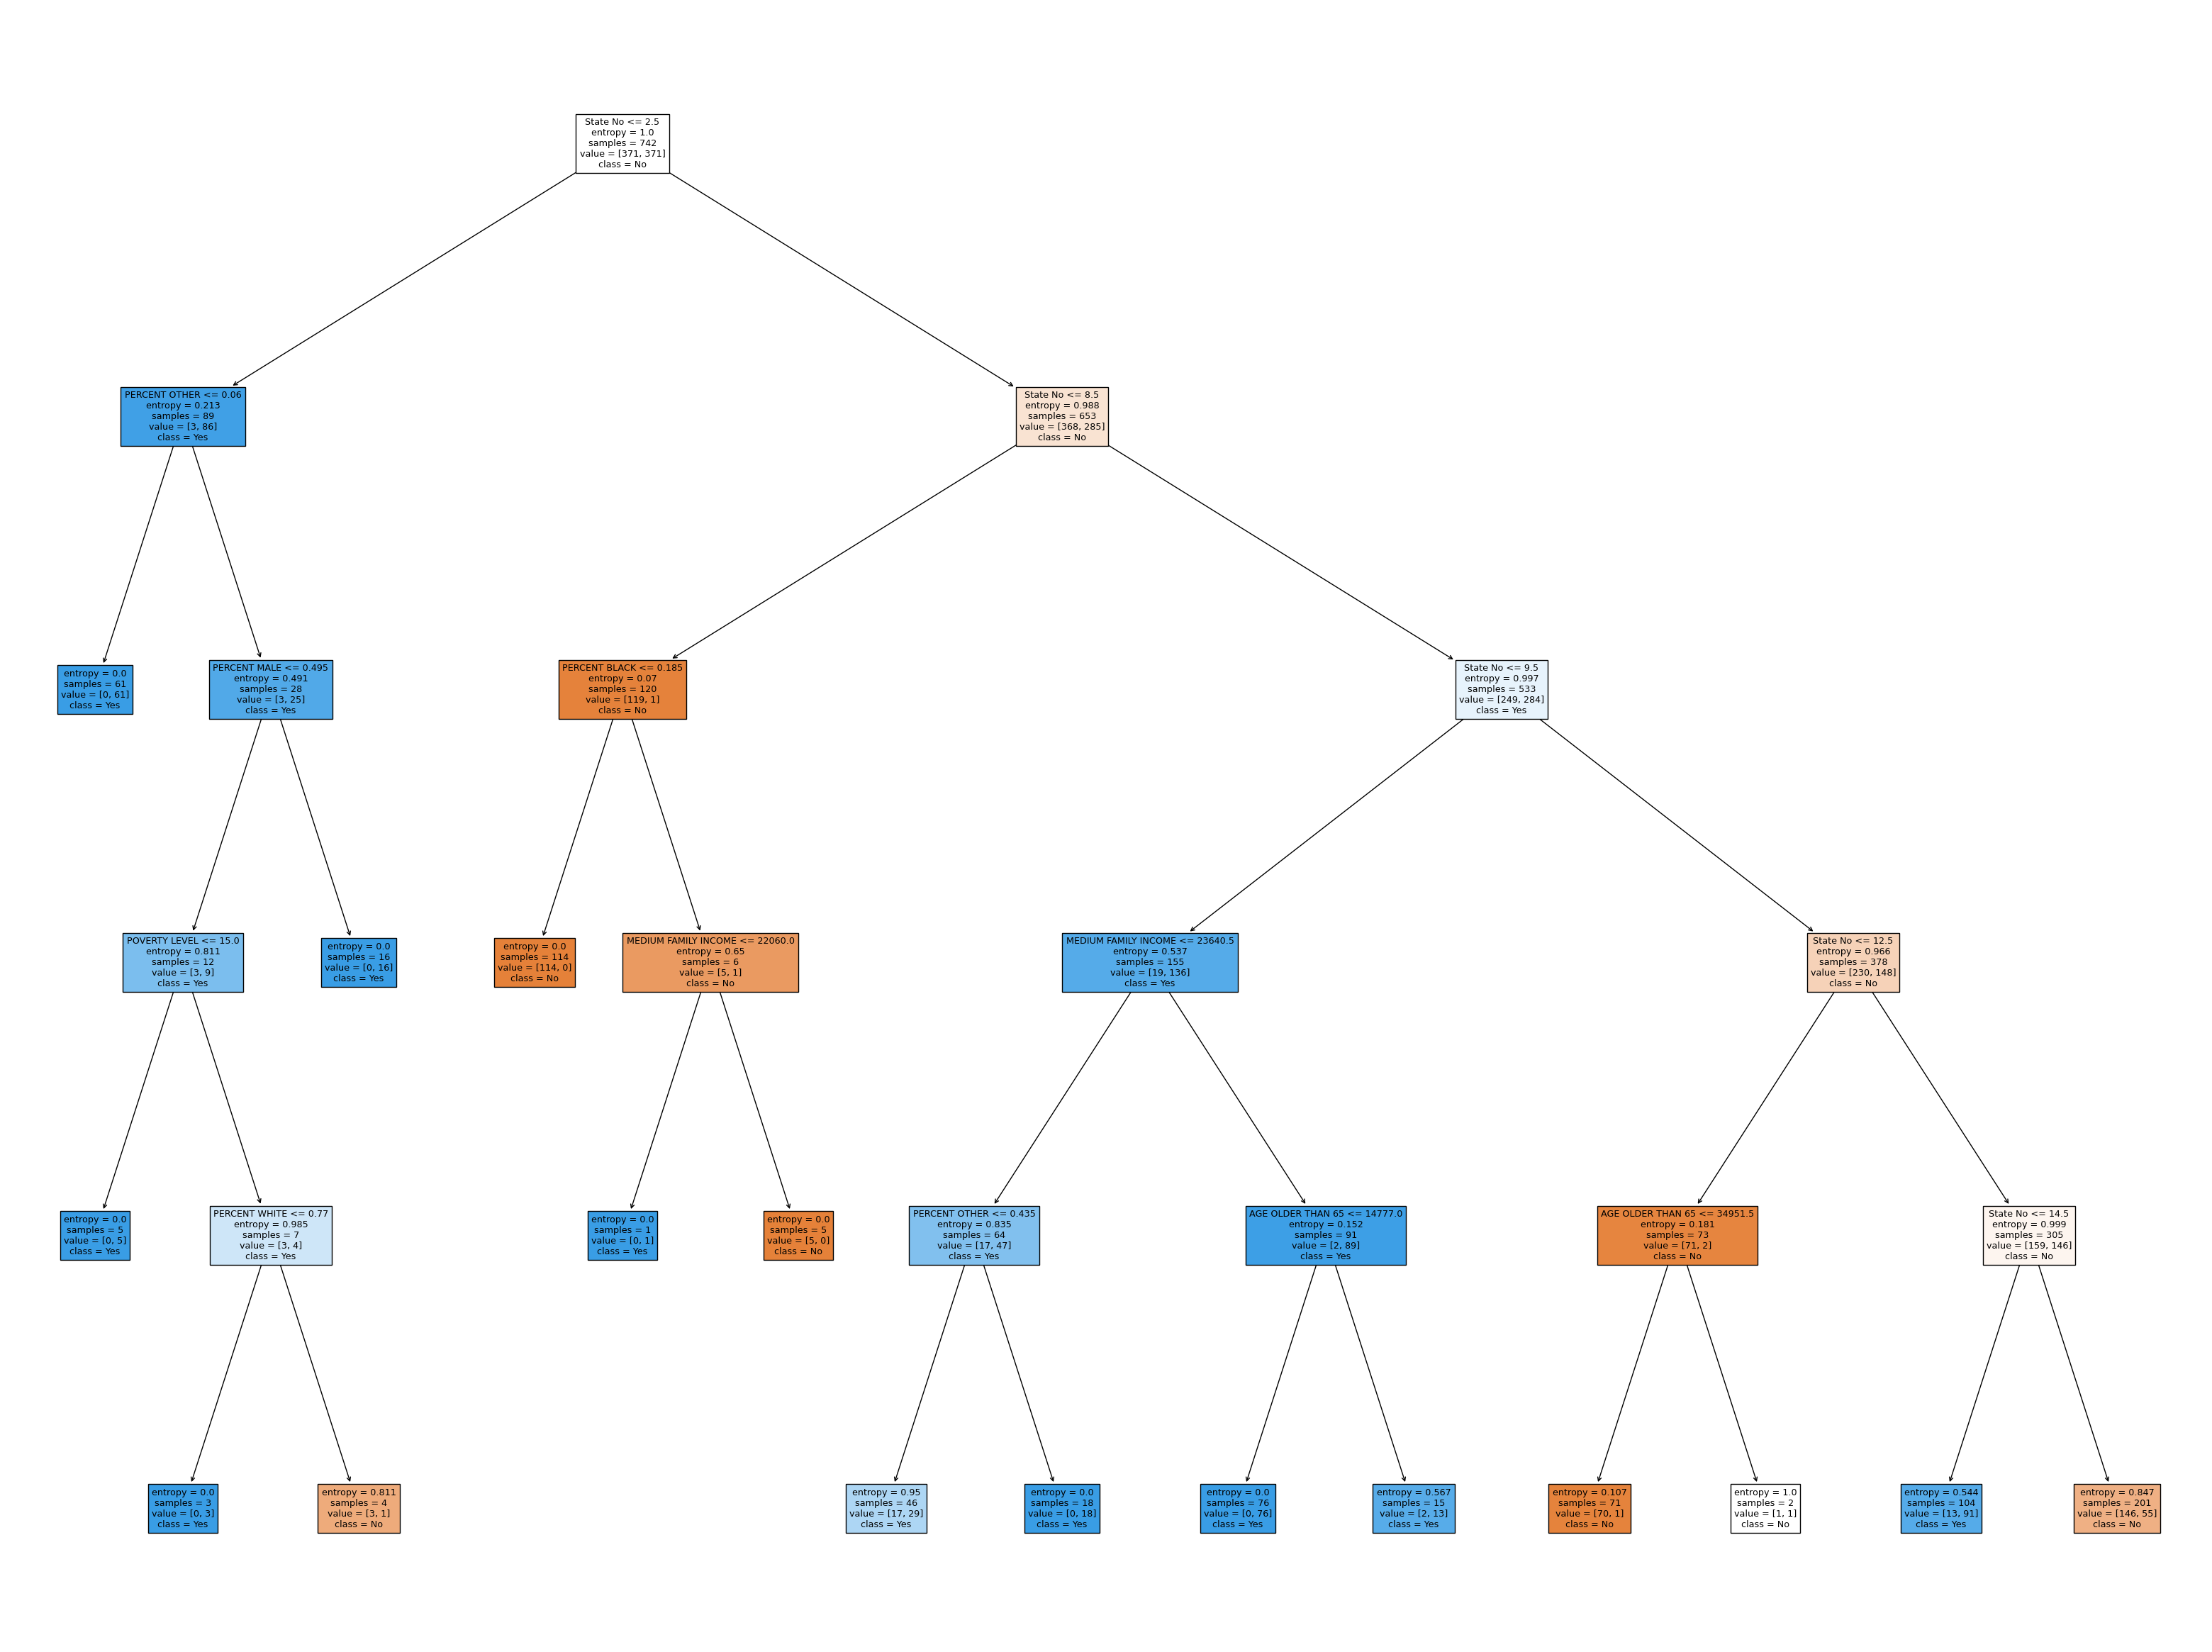

In [37]:
# plotting the tree

fig = plt.figure(figsize=(40,30))
tree.plot_tree(model2,
               feature_names = list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [38]:
# Now I will have my second model2 make a prediction on test data.

prediction_on_test = model2.predict(predictors_test)

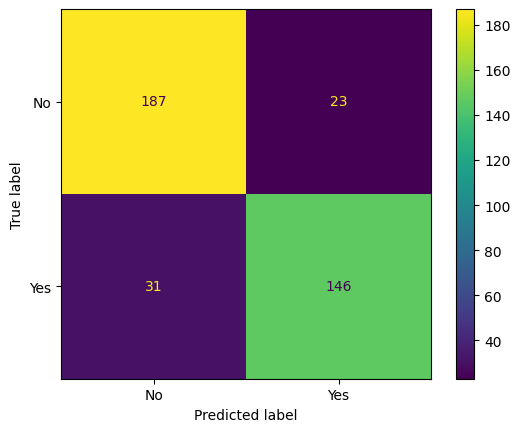

In [39]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_).plot()

In [40]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score

print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       210
         Yes       0.86      0.82      0.84       177

    accuracy                           0.86       387
   macro avg       0.86      0.86      0.86       387
weighted avg       0.86      0.86      0.86       387



In these two modles it shows that going to a length of 5 imporves my model accuracy by 8% totaling at 86% which is huge just from increasing it by two rows. My precision did drop from model 1 (88) to modle 2 (86) however, this little drop helped my presicion on NO increase 13% showing my modle is better at identifying if someone voted yes or no. On recall it did decrease on no however, my Yes did increase so making each model better at catching who voted no and who voted yes.

## Naive Bayes model prediction

In [41]:
# Building a Naive Bayes model on training data
model_NB = MultinomialNB()
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [42]:
# Make predictions on testing data (0.5 points)
prediction_on_test_NB = model_NB.predict(predictors_test)

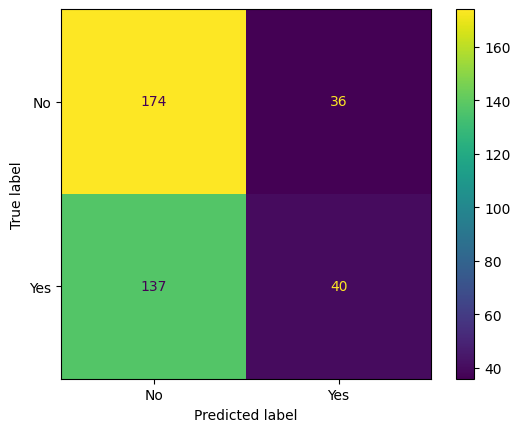

In [43]:
# Examine the evaluation results on testing data: confusion_matrix
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [44]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score.
print(classification_report(target_test, prediction_on_test_NB))

              precision    recall  f1-score   support

          No       0.56      0.83      0.67       210
         Yes       0.53      0.23      0.32       177

    accuracy                           0.55       387
   macro avg       0.54      0.53      0.49       387
weighted avg       0.54      0.55      0.51       387




The Naive Bayes model achieved an accuracy of 0.56, lower than the Decision Tree model. It showed good recall for class No (.84) but recall for class Yes fell short(0.23). The F1-score for class 1 was 0.32, indicating a need for improvement in balancing precision and recall. These means I need refining the model for better performance.

## **K Nearest Neighbor**

### n_neighbors = 1

In [45]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,State No,POPULATION,PCI,MEDIUM FAMILY INCOME,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MALE,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,BALLOT TYPE_2,MSA_2
0,0.0,0.219510,0.254833,0.515754,0.065505,0.742268,0.0375,0.226804,0.588235,0.154176,0.116095,0.228133,0.163967,0.216300,0.231919,0.164601,0.0,0.0
1,0.0,0.011021,0.206712,0.250795,0.005437,0.577320,0.0000,0.412371,0.576471,0.462527,0.168865,0.011895,0.013379,0.009108,0.010111,0.010171,0.0,1.0
2,0.0,0.324387,0.475978,0.751969,0.143952,0.845361,0.0750,0.092784,0.569412,0.057816,0.063325,0.314959,0.214344,0.344358,0.349952,0.238321,0.0,0.0
3,0.0,0.004161,0.182896,0.348565,0.001084,0.731959,0.0000,0.268041,0.621176,0.293362,0.116095,0.004420,0.001545,0.003571,0.005479,0.004905,0.0,1.0
4,0.0,0.003507,0.342724,0.249413,0.000432,0.927835,0.0000,0.072165,0.585882,0.338330,0.010554,0.003131,0.001479,0.002567,0.004464,0.007513,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1.0,0.293719,0.339528,0.354623,0.021850,0.474227,0.0125,0.505155,0.592941,0.528908,0.395778,0.352826,0.223096,0.230481,0.309737,0.290515,0.0,0.0
1283,1.0,0.043703,0.370174,0.497144,0.006718,0.865979,0.0375,0.103093,0.658824,0.248394,0.195251,0.033676,0.025243,0.036557,0.059111,0.077056,0.0,1.0
1284,1.0,0.606855,0.592582,0.864572,0.098106,0.608247,0.0250,0.371134,0.609412,0.152034,0.131926,0.589295,0.476635,0.537388,0.724238,0.627295,0.0,0.0
1285,1.0,0.126846,0.517320,0.610945,0.044713,0.639175,0.0250,0.340206,0.590588,0.269807,0.126649,0.112319,0.173546,0.106216,0.136374,0.125905,0.0,0.0


In [46]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 1
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# Make predictions on training and testing data
prediction_on_train = model.predict(predictors_train)
prediction_on_test = model.predict(predictors_test)

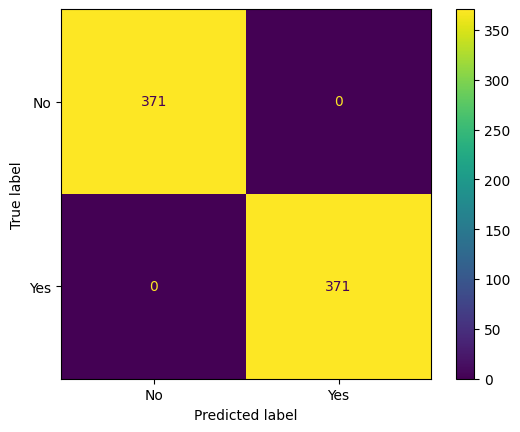

In [48]:
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [49]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score (1 points)
print(classification_report(target_train, prediction_on_train ))

# With this model I was expecting to get a perfect model because the model is esentally looking at itself and itself is 100% correct.

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       371
         Yes       1.00      1.00      1.00       371

    accuracy                           1.00       742
   macro avg       1.00      1.00      1.00       742
weighted avg       1.00      1.00      1.00       742



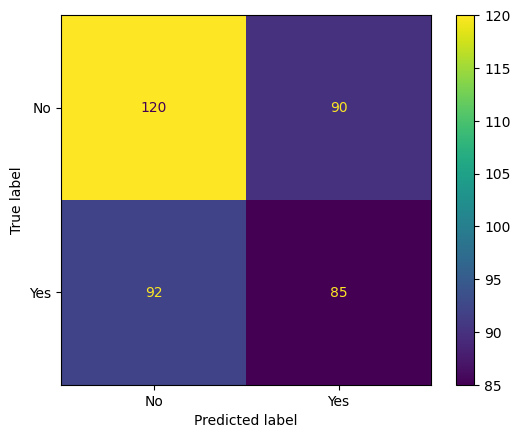

In [50]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [51]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 points)
print(classification_report(target_test,prediction_on_test))
# However it dose porly on test data which is the most importent.

              precision    recall  f1-score   support

          No       0.57      0.57      0.57       210
         Yes       0.49      0.48      0.48       177

    accuracy                           0.53       387
   macro avg       0.53      0.53      0.53       387
weighted avg       0.53      0.53      0.53       387



### n_neighbors = 4

In [52]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 3
model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
# Make predictions on training and testing data
prediction_on_train = model2.predict(predictors_train)
prediction_on_test = model2.predict(predictors_test)

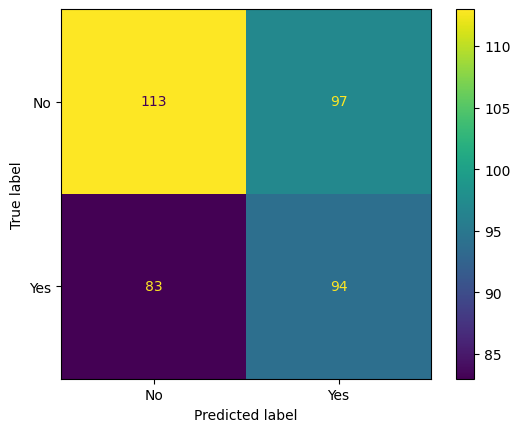

In [54]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [55]:
# Examine the evaluation results on test data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test ))

              precision    recall  f1-score   support

          No       0.58      0.54      0.56       210
         Yes       0.49      0.53      0.51       177

    accuracy                           0.53       387
   macro avg       0.53      0.53      0.53       387
weighted avg       0.54      0.53      0.54       387



For my KNN model I yet again recieved lower accuracy compared to my decision tree how ever it increased compared to my Naive Bayes model. All of my categorys increased when I increased k = 3 however, when I increased it more things seem to drop. So there is still some tweaking I need to work out.

# Results and Model Evaluation

Out of all the machine learning models I tested, the decision tree emerged as the star player. Showcasing its ability to unveil intricate data patterns with an outstanding accuracy of 85%. Impressively, it consistently scored 80% or higher in recall, precision, and F1-score metrics. However, the same cannot be said for the other models. My Naive Bayes model struggled, yielding a mere 56% accuracy and a dismal 23% recall for positive votes. Lastly, the KNN model showed improvement, not enough to celebrate. It reached an accuracy of 60% after increasing K to 4. Although its precision in classifying negitive votes was better compared to positive votes there is still work needed to enhance this model further.

# Conclusion
 In conclusion, this project delved into machine learning algorithms to predict voting behavior. The Decision Tree model emerged as the standout performer, showcasing high accuracy and strength in capturing intricate data patterns. On the other hand, Naive Bayes struggled with accuracy and recall, highlighting its limitations. The K-Nearest Neighbors model showed promise after tuning but requires further refinement. Overall, this project emphasizes  the importance of selecting the right algorithm for specific data contexts and objectives, providing valuable insights for future predictive modeling endeavors.

In [56]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/IncremonaBrandonUse.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IncremonaBrandonUse.ipynb to html
[NbConvertApp] Writing 2162648 bytes to /content/drive/MyDrive/Colab Notebooks/IncremonaBrandonUse.html
